In [1]:
# ================================
# STEP 1 — IMPORT LIBRARIES
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Sales dataset structure
sales_data = pd.DataFrame({
    'StoreID': [1, 1, 2, 2, 3, 3],
    'Date': pd.to_datetime(['2026-02-01','2026-02-01','2026-02-01','2026-02-02','2026-02-01','2026-02-02']),
    'Time': ['11:25','12:30','13:10','17:50','10:15','21:10'],
    'Item': ['Fatayer Cheese','Fatayer Meat','Fatayer Spinach','Fatayer Cheese','Fatayer Cheese','Fatayer Meat'],
    'Qty': [12, 8, 15, 7, 10, 6],
    'SellPrice': [4.50, 5.50, 4.00, 4.50, 4.50, 5.50]
})

# Compute revenue
sales_data['Revenue'] = sales_data['Qty'] * sales_data['SellPrice']
sales_data.head()

,StoreID,Date,Time,Item,Qty,SellPrice,Revenue
0,1,2026-02-01,11:25,Fatayer Cheese,12,4.5,54.0
1,1,2026-02-01,12:30,Fatayer Meat,8,5.5,44.0
2,2,2026-02-01,13:10,Fatayer Spinach,15,4.0,60.0
3,2,2026-02-02,17:50,Fatayer Cheese,7,4.5,31.5
4,3,2026-02-01,10:15,Fatayer Cheese,10,4.5,45.0


In [3]:
# Total revenue
total_rev = sales_data['Revenue'].sum()

# Average check (avg revenue per transaction)
avg_check = sales_data['Revenue'].mean()

# Transactions per hour
sales_data['Hour'] = pd.to_datetime(sales_data['Time']).dt.hour
tx_per_hour = sales_data.groupby('Hour').size()

print(f"Total Revenue: £{total_rev:.2f}")
print(f"Avg. Check Size: £{avg_check:.2f}")
print("Transactions per Hour:")
print(tx_per_hour)

Total Revenue: £267.50
Avg. Check Size: £44.58
Transactions per Hour:
Hour
10    1
11    1
12    1
13    1
17    1
21    1
dtype: int64


/var/folders/88/w4w1n8l12kd_z42_6mrnndmw0000gn/T/ipykernel_80444/1982251946.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_data['Hour'] = pd.to_datetime(sales_data['Time']).dt.hour


In [4]:
# Example ingredient cost per menu item
food_costs = {
    'Fatayer Cheese': 2.00,
    'Fatayer Meat': 2.75,
    'Fatayer Spinach': 1.75
}

sales_data['FoodCost'] = sales_data['Item'].map(food_costs)
sales_data['Profit'] = sales_data['Revenue'] - (sales_data['FoodCost'] * sales_data['Qty'])
sales_data['ProfitMargin'] = sales_data['Profit'] / sales_data['Revenue']

menu_summary = sales_data.groupby('Item')[['Revenue','Profit','ProfitMargin']].agg(['sum','mean']).round(2)
menu_summary

Revenue       Profit        ProfitMargin      
                    sum  mean    sum   mean          sum  mean
Item                                                          
Fatayer Cheese    130.5  43.5  72.50  24.17         1.67  0.56
Fatayer Meat       77.0  38.5  38.50  19.25         1.00  0.50
Fatayer Spinach    60.0  60.0  33.75  33.75         0.56  0.56

In [5]:
sales_data['FoodCostPct'] = (sales_data['FoodCost'] * sales_data['Qty']) / sales_data['Revenue'] * 100

# Example inventory turnover placeholder
inv_turnover = sales_data.groupby('Item')['Qty'].sum()
inv_turnover

Item
Fatayer Cheese     29
Fatayer Meat       14
Fatayer Spinach    15
Name: Qty, dtype: int64

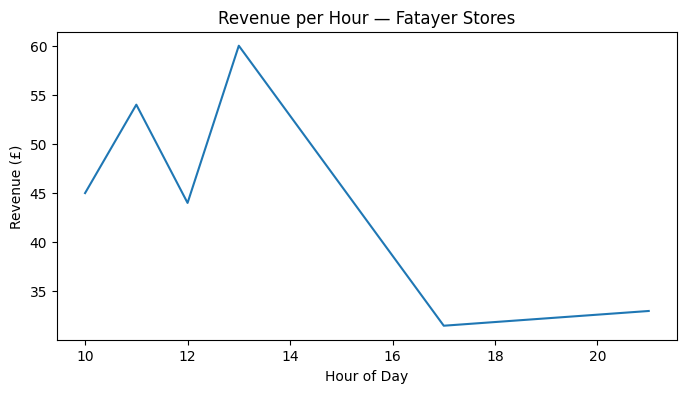

In [6]:
rev_per_hour = sales_data.groupby('Hour')['Revenue'].sum()

plt.figure(figsize=(8,4))
sns.lineplot(x=rev_per_hour.index, y=rev_per_hour.values)
plt.title('Revenue per Hour — Fatayer Stores')
plt.xlabel('Hour of Day')
plt.ylabel('Revenue (£)')
plt.show()

In [7]:
staff_data = pd.DataFrame({
    'StoreID': [1,2,3],
    'NumStaff': [5,7,4],
    'WeeklyHours': [40,42,38],
    'StaffCost': [1200,1500,1000]   # Weekly staffing cost (£)
})

staff_data

,StoreID,NumStaff,WeeklyHours,StaffCost
0,1,5,40,1200
1,2,7,42,1500
2,3,4,38,1000


In [8]:
customer_data = pd.DataFrame({
    'CustID': [101,102,103,104],
    'StoreID': [1,1,2,3],
    'Rating': [5,4,2,4],
    'SpecialReq': ['extra spice','halal','vegan','no onions'],
    'VisitDate': pd.to_datetime(['2026-02-01','2026-02-01','2026-02-02','2026-02-01'])
})

customer_data

,CustID,StoreID,Rating,SpecialReq,VisitDate
0,101,1,5,extra spice,2026-02-01
1,102,1,4,halal,2026-02-01
2,103,2,2,vegan,2026-02-02
3,104,3,4,no onions,2026-02-01


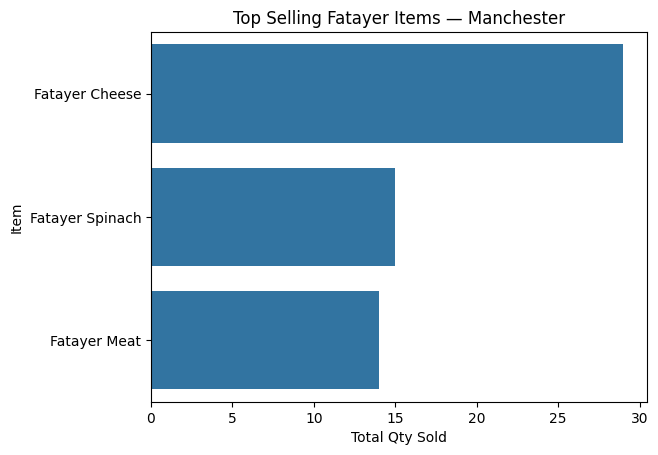

In [9]:
best_selling = sales_data.groupby('Item')['Qty'].sum().sort_values(ascending=False)

sns.barplot(x=best_selling.values, y=best_selling.index)
plt.title('Top Selling Fatayer Items — Manchester')
plt.xlabel('Total Qty Sold')
plt.show()

In [10]:
summary = {
    'TotalRevenue': total_rev,
    'AvgCheckSize': avg_check,
    'TopItem': best_selling.index[0],
    'AvgProfitMargin': sales_data['ProfitMargin'].mean(),
    'PeakHour': sales_data['Hour'].mode()[0]
}

pd.DataFrame([summary])

,TotalRevenue,AvgCheckSize,TopItem,AvgProfitMargin,PeakHour
0,267.5,44.583333,Fatayer Cheese,0.538194,10
